In [25]:
import matplotlib.pyplot as plt
import os
from deepface import DeepFace

In [26]:
model_name= 'Facenet'
backend = 'retinaface'

In [27]:
alt_path = 'rafas/IMG_7288.jpg'
base_img_path = 'rafas/IMG_2891.jpg'

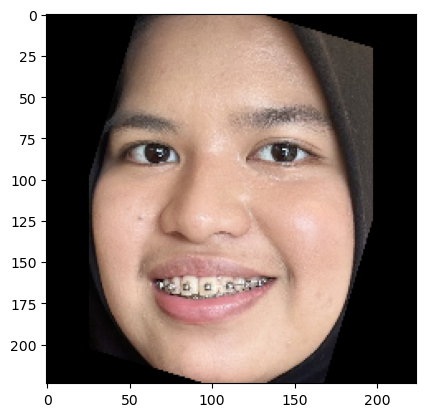

In [4]:
plt.imshow(DeepFace.extract_faces(img_path=base_img_path, detector_backend='retinaface')[0]['face'])

In [5]:
test_folder = 'test'
test_images = os.listdir(test_folder)

In [22]:
def predict(img_path, base_img_path=base_img_path, model_name=model_name, backend=backend):
    try: 
        score = DeepFace.verify(img1_path=base_img_path, img2_path=img_path, model_name=model_name, detector_backend=backend)['distance']
    except Exception as e:
        print(f'Error: {e}')
        return

    face = DeepFace.extract_faces(img_path, detector_backend=backend)
    if len(face) > 0:
        plt.imshow(face[0]['face'])
        plt.title('Score : {:.2f}'.format(score))
    else:
        print('No face detected')

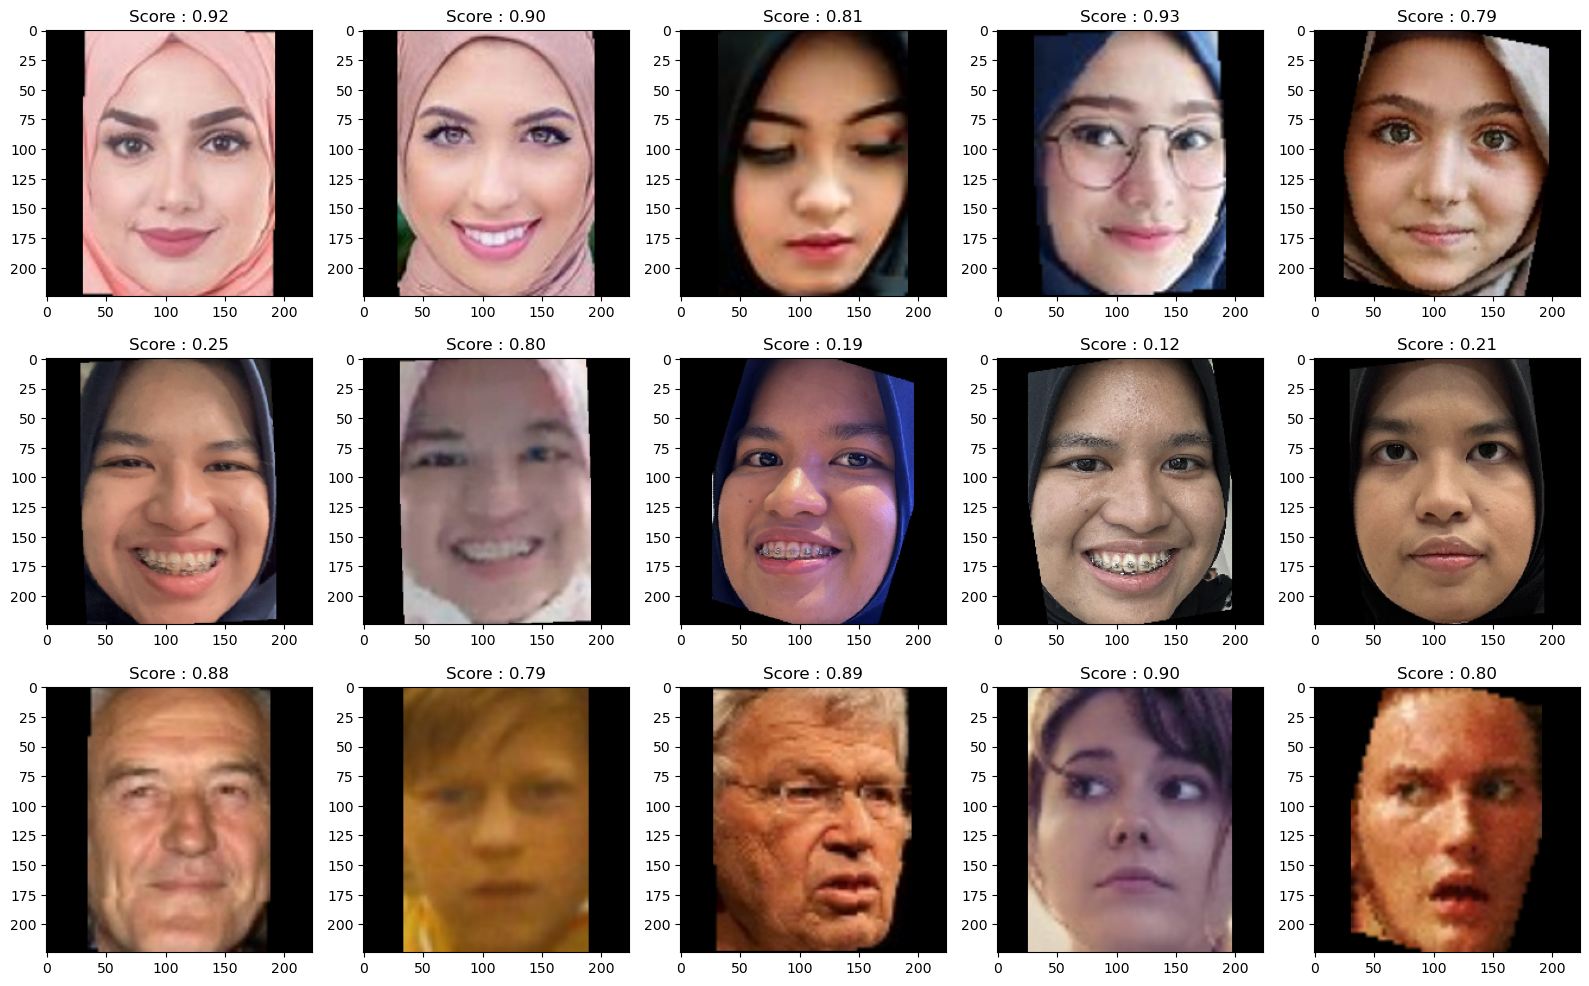

In [24]:
fig, axes = plt.subplots(3,5,figsize=(16,10))
for i, image in enumerate(test_images):
    img_path = os.path.join(test_folder, image)
    try: 
        score = DeepFace.verify(img1_path=base_img_path, img2_path=img_path, model_name=model_name, detector_backend=backend)['distance']
    except Exception as e:
        print(f'Error: {e}')
        break
    
    axes.flatten()[i].imshow(DeepFace.extract_faces(img_path,detector_backend=backend)[0]['face'])
    axes.flatten()[i].set_title('Score : {:.2f}'.format(score))

plt.tight_layout()
plt.show()